This notebook generates the figures in Echols, Rocap, and Riser (). Figures 2-5, 7 and Supplemental Figures 1,2,5, and 6 are produced in the original notebook (GMM_public.ipynb) that is provided to accompany this paper for exploring the process of creating the clusters. Figure 14, Supplemental Figures 3 and 7, and related code for doing curve-fitting is in a separate notebook titled "GMM_curve_fitting.ipynb"). This code also produces Supplemental Figure 4. 

In [91]:
#Import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import cmocean
import matplotlib as mpl
import gsw

In [92]:
#Import files to be used for creating figures. Note that if you ran the other notebook and opted to save the data,
#this file should simply be the output from that notebook.
gmm_file='/Users/rosalindechols/Documents/Generals/Self_Shading_Research/Analysis/PCA_GMM/FINAL/17pcs_21clusters/gmm_results_17pcs_21clusters.nc'
sfpath='/Users/rosalindechols/Documents/Generals/Self_Shading_Research/Analysis/PCA_GMM/FINAL/17pcs_21clusters/'

save_figs=False

print('Import data')
data=xr.open_dataset(gmm_file)

new_labels_done=True

print('Sort clusters by surface chlorophyll')
if new_labels_done==True:
    new_labels=np.loadtxt(sfpath+'new_labels.txt',delimiter=',')

else:
    new_labels=np.zeros(len(data['gmm_labels']))
    for n in range(0,len(data['gmm_labels'])):
        new_labels[n]=next(i for i, j in enumerate(data['gmm_new_groups']) if j==data['gmm_labels'].values[n])
    np.savetxt(sfpath+"new_labels.txt", new_labels, delimiter=",")

Import data
Sort clusters by surface chlorophyll


In [93]:
#Manually assign clusters to groups based on observations from previous notebook. In this case, the clusters
#provided are those used in the paper.
scm_group=[1,2,3,5,6,7]
mixed_group=[4,8,9,10,12,13,15,17,19]
hetero_group=[11,14,16,18,20,21]

Figure 1: Figure 1 consists of statistics about the geographical and temporal distribution of the data used in this study.

Figure Caption: Figure 1. (a) Concentration of chlorophyll fluorescence profiles collected by biogeochemical Argo floats. Each box is 5x5 degrees. Gray shading indicates no (useable) profiles were gathered in that region. (b) Distribution of profiles by year. (c) Distribution of profiles by latitude. (d) Number of profiles gathered in each month.

Create Figure 1a
Calculate totals and percents in each box
Current Latitude:  -80
Current Latitude:  -60
Current Latitude:  -40
Current Latitude:  -20
Current Latitude:  0
Current Latitude:  20
Current Latitude:  40
Current Latitude:  60
Current Latitude:  80
Make plot


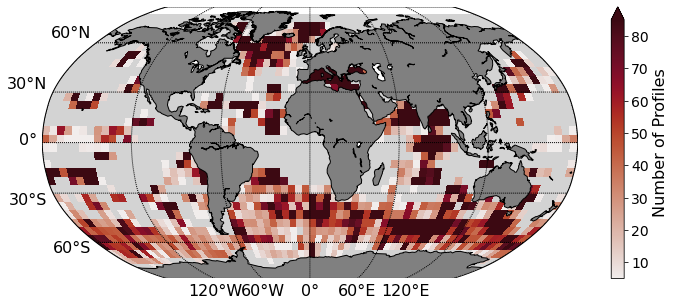

In [94]:
print('Create Figure 1a')
print('Calculate totals and percents in each box')
increment=5
x=np.arange(-180,181,increment)
y=np.arange(-80,85,increment)
totals=np.nan*np.ones((len(y),len(x)))

#sort data by latitude
lat_sort=sorted(data['LATITUDE'].values)

#retain original indices of sorted data
lat_sort_ind=data['LATITUDE'].values.argsort()

start=0
lats=0

for n in y:
    lons=0
    if n%20==0:
        print("Current Latitude: ",n)
    #find 5-degree latitude subset
    try:
        end=next(i for i, j in enumerate(lat_sort) if j>=n+increment)
    except StopIteration:
        continue
    #find 5-degree longitude subsets
    for nn in x:
        lon_set=[i for i,j in enumerate(data['LONGITUDE'].values[lat_sort_ind[start:end]]) if nn <= j < nn+increment]
        if len(lon_set)==0:
            pass
        else:
            totals[lats,lons]=len(lon_set)
        lons+=1
    lats+=1
    start=end

print('Make plot')
fig=plt.figure(figsize=(12,5))
m = Basemap(projection='robin',lon_0=-0,resolution='c')
X,Y = np.meshgrid(x,y) 
cmap=cmocean.cm.amp
cmap.set_bad('lightgray')#,alpha=0.5)
cp1=m.pcolormesh(X,Y,totals,cmap=cmap,vmin=5,vmax=85,latlon='True')
m.drawcoastlines()
m.fillcontinents(color='gray')
m.drawparallels(np.arange(-90., 91., 30.), labels = [1,0,0,0], fontsize = 16)
m.drawmeridians(np.arange(-180., 181., 60.), labels = [0,0,0,1], fontsize = 16)
cbar=fig.colorbar(cp1,extend='max')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Number of Profiles',fontsize=16)

if save_figs==True:
    plt.savefig(sfpath+'Figure_1a.pdf', bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Create Figure 1b


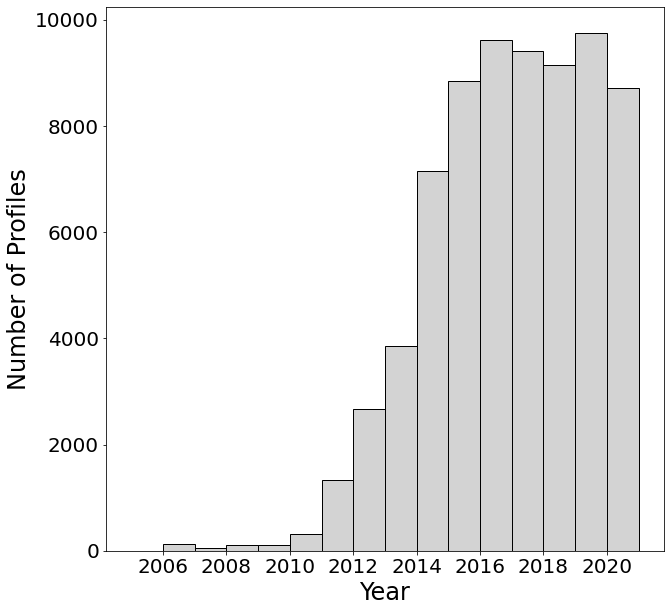

In [95]:
print('Create Figure 1b')
dates = pd.to_datetime(data['JULD'].values).year
fig=plt.figure(figsize=(10,10))
plt.hist(dates,bins=np.arange(2005,2022,1),facecolor='lightgray',edgecolor='k')
plt.tick_params(labelsize=20)
plt.xlabel('Year',fontsize=24)
plt.ylabel('Number of Profiles',fontsize=24)

if save_figs==True:
    plt.savefig(sfpath+'Figure_1b.pdf',bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Create Figure 1c


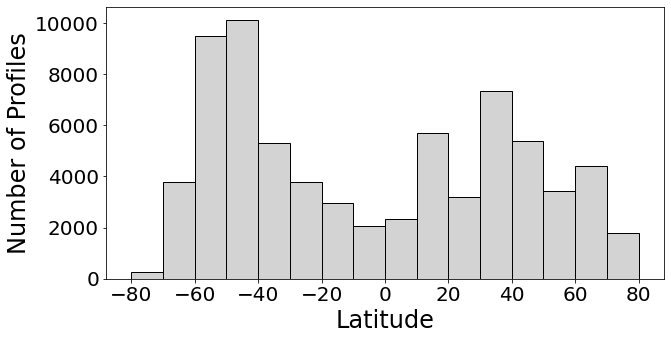

In [96]:
print('Create Figure 1c')

fig=plt.figure(figsize=(10,5))
plt.hist(data['LATITUDE'].values,bins=np.arange(-80,81,10),facecolor='lightgray',edgecolor='k')
plt.tick_params(labelsize=20)
plt.xlabel('Latitude',fontsize=24)
plt.ylabel('Number of Profiles',fontsize=24)

if save_figs==True:
    plt.savefig(sfpath+'Figure_1c.pdf',bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Create Figure 1d
Find months


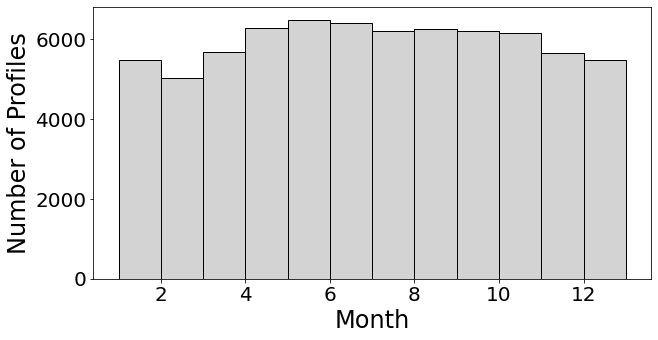

In [97]:
print('Create Figure 1d')
print('Find months')
make_months=False
dates = pd.to_datetime(data['JULD'].values).month

if make_months==True:
    # seasons_north=[[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
    # dates = pd.to_datetime(data['JULD'].values).month
    months=np.zeros(len(dates))
    for m in range(0,len(months)):
        if data['LATITUDE'].values[m]>=0:
            months[m]=dates[m]
        else:
            if dates[m]>=7:
                months[m]=dates[m]-6
            else:
                months[m]=dates[m]+6
    np.savetxt(sfpath+'chla_months.txt',months,delimiter=',')
else:
    months=np.loadtxt(sfpath+'chla_months.txt',delimiter=',')
    
fig=plt.figure(figsize=(10,5))
plt.hist(months,bins=np.arange(1,14,1),facecolor='lightgray',edgecolor='k')
plt.tick_params(labelsize=20)
plt.xlabel('Month',fontsize=24)
plt.ylabel('Number of Profiles',fontsize=24)

if save_figs==True:
    plt.savefig(sfpath+'Figure_1d.pdf',bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Figure 6. Figure 6 shows the relative depths of physical and biological profile characteristics for each cluster, and how different clusters are distributed by latitude.

Figure Caption: Figure 6. (a) Distribution of mixed layer depths (white fill) and chlorophyll maximum (gray fill) for each cluster. Vertical dashed lines mark the separation between each subgroup (from L to R: deep SCM; well-mixed; shallow SCM). For deep and shallow SCM clusters (L and R), gray fill boxes indicate depth of maximum chlorophyll; for well-mixed clusters (center), gray fill boxes mark approximate base of the well-mixed chlorophyll layer. (b) Absolute latitude distribution for each cluster.

In [98]:
def mld(data,index,threshold=0.03):
    '''Find MLD for a particular density threshold, using a reference
    depth of 10m'''
    
    ref_value = data['PDENSITY'][index,2] #density is in sigma-theta, -1000
    d_mld = ref_value + threshold
    try:
        ind=next(i-1 for i, j in enumerate(data['PDENSITY'][index]) if (j > d_mld and i > 2))
        mld=data['DEPTH'][index,ind]
    except StopIteration:
        mld=np.nan
        ind=np.nan
    
    return mld,ind

def chl_mld(data,index,threshold=0.01):
    ref_value = data['CHLA'].values[index,2]
    d_mld = ref_value - threshold
    try:
        ind=next(i-1 for i, j in enumerate(data['CHLA'].values[index]) if (j <= d_mld and i > 2))
        mld=data['DEPTH'][0,ind]
    except StopIteration:
        mld=np.nan
        ind=np.nan
        
    return mld, ind

In [99]:
print('Find mixed layer depth')
data=data.assign(PDENSITY=(('t','z'),gsw.rho(data['PSAL'],data['TEMP'],0)))
data=data.assign(MLD=(('t'),np.zeros(len(data['PDENSITY']))))
for n in range(0,len(data['MLD'])):
    data['MLD'][n],ind=mld(data,n)

Find mixed layer depth


/Users/rosalindechols/anaconda3/lib/python3.8/site-packages/gsw/_wrapped_ufuncs.py:2840: RuntimeWarning: invalid value encountered in rho
  return _gsw_ufuncs.rho(SA, CT, p)


Create Figure 6a


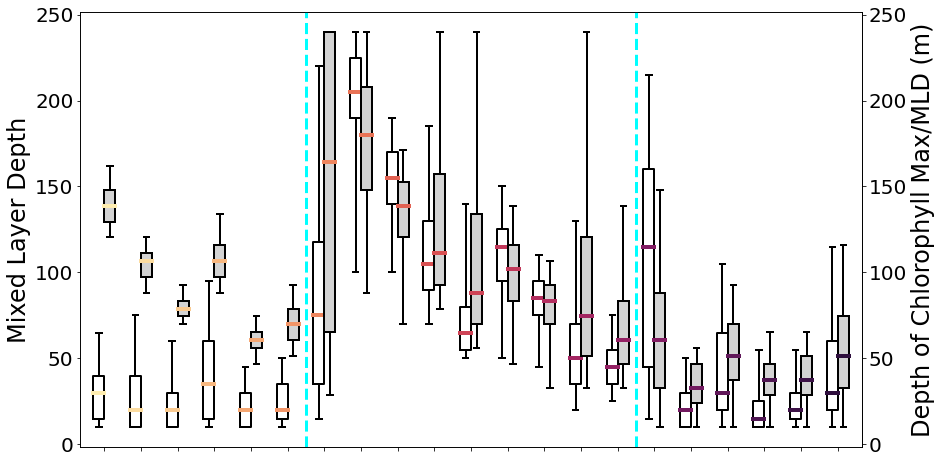

In [100]:
print('Create Figure 6a')

all_mld=[]
cmld2=[]

alt_order=[1,2,3,5,6,7,4,8,9,10,12,13,15,17,19,11,14,16,18,20,21]
# all_lats=[]
cmld=np.zeros(len(alt_order))

 
for n in alt_order:         
#     # print(n)
    group=[i for i,j in enumerate(new_labels) if j+1==n]

    all_mld.append(data['MLD'][group][~np.isnan(data['MLD'][group])])
    temp_cmld=np.zeros(len(group))
    count=0
    no_good=0

    for nn in group:
    #for well-mixed group, find base of chlorophyll mixed layer (this is more useful than
    #finding the depth of the maximum since the chlorophyll in these profiles is well-mixed)
        if n in [4,8,9,10,12,13,15,17,19]:
            if n==4:
                #this group has such low values that a smaller threshold is necessary
                temp=chl_mld(data,nn,threshold=0.01)[0]
                if np.isnan(temp):
                    no_good+=1
                    temp_cmld[count]=250
                else:
                    temp_cmld[count]=temp
            else:
                temp=chl_mld(data,nn,threshold=0.04)[0]
                if np.isnan(temp):
                    no_good+=1
                    temp_cmld[count]=250
                else:
                    temp_cmld[count]=temp
               
        #for other groups, find base of maximum chlorophyll
        else:
            loc=next(i for i,j in enumerate(data['CHLA'].values[nn]) if j==max(data['CHLA'].values[nn]))
            temp_cmld[count]=data['DEPTH'][0,loc]
           
        count+=1
    
    cmld2.append(temp_cmld)

colors = cmocean.cm.matter(np.linspace(0,1,len(alt_order)))
fig=plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

bp=ax.boxplot(all_mld,sym='',positions=np.arange(1,len(alt_order)+1)-0.15,widths=0.3,whis=[5,95])#,notch=True)
#change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(linewidth=2)

#change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)

#change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(linewidth=2)

#change color and linewidth of the medians
count=0
for median in bp['medians']:
    median.set(color=colors[count], linewidth=4)
    count+=1

ax1=plt.twinx()
bp1=ax1.boxplot(cmld2,sym='',positions=np.arange(1,len(alt_order)+1)+0.15,widths=0.3,patch_artist=True,whis=[5,95])#,notch=True)
#change outline color, fill color and linewidth of the boxes
plt.setp(ax.get_xticklabels(), visible=False)
for box in bp1['boxes']:
    # change outline and face color
    box.set(linewidth=2)
    box.set(facecolor='lightgray')
    
#change color and linewidth of the whiskers
for whisker in bp1['whiskers']:
    whisker.set(linewidth=2)

#change color and linewidth of the caps
for cap in bp1['caps']:
    cap.set(linewidth=2)

#change color and linewidth of the medians
count=0
for median in bp1['medians']:
    median.set(color=colors[count], linewidth=4)
    count+=1

plt.axvline(6.5,lw=3,c='cyan',linestyle='dashed')
plt.axvline(15.5,lw=3,c='cyan',linestyle='dashed')
ax.tick_params(labelsize=20, right=False)
ax1.tick_params(right=False)
#ax.set_xlabel('Group',fontsize=24)
ax.set_ylabel('Mixed Layer Depth',fontsize=24)
ax.set_xticks(np.arange(1,len(alt_order)+1))
#ax.set_xticks(np.arange(1,len(alt_order)+1),labels=alt_order)
secax = ax.secondary_yaxis('right')
secax.set_ylabel('Depth of Chlorophyll Max/MLD (m)',fontsize=24)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
#plt.setp(ax1.get_yticks(), visible=False)
secax.tick_params(axis='y',labelsize=20)

if save_figs==True:
    plt.savefig(sfpath+'Figure_6a.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Create Figure 6b


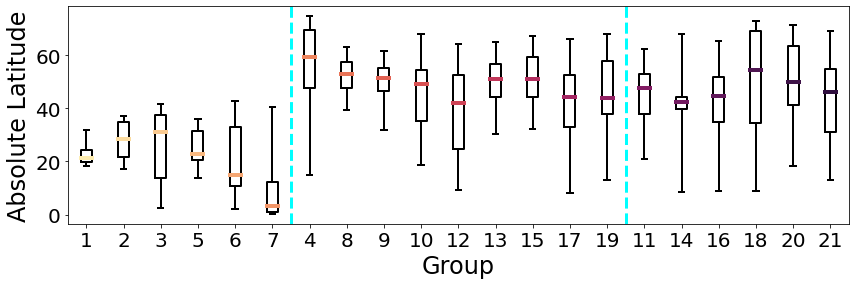

In [101]:
print('Create Figure 6b')

#resequence groups so they are clustered by type
alt_order=[1,2,3,5,6,7,4,8,9,10,12,13,15,17,19,11,14,16,18,20,21]
all_lats=[]

for n in alt_order:         
#     # print(n)
     group=[i for i,j in enumerate(new_labels) if j+1==n]
     all_lats.append(abs(data['LATITUDE'][group][~np.isnan(data['LATITUDE'][group])]))

colors = cmocean.cm.matter(np.linspace(0,1,len(alt_order)))
fig=plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

bp=ax.boxplot(all_lats,sym='',positions=np.arange(1,len(alt_order)+1),widths=0.3,whis=[5,95])

for box in bp['boxes']:
    # change outline color
    box.set(linewidth=2)

#change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)

#change color and linewidth of the caps
for cap in bp['caps']:
     cap.set(linewidth=2)

#change color and linewidth of the medians
count=0
for median in bp['medians']:
    median.set(color=colors[count], linewidth=4)
    count+=1

plt.axvline(6.5,lw=3,c='cyan',linestyle='dashed')
plt.axvline(15.5,lw=3,c='cyan',linestyle='dashed')
plt.tick_params(labelsize=20)
plt.xlabel('Group',fontsize=24)
plt.ylabel('Absolute Latitude',fontsize=24)
plt.xticks(np.arange(1,len(alt_order)+1),labels=alt_order)
    
if save_figs==True:
    plt.savefig(sfpath+'Figure_6b.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Figure 8: 

Figure Caption: Figure 8. (a) Plot of Southern Ocean (latitude <40S) clusters, with locations of commonly observed fronts. (b) Percentage of profiles associated with each broad subgroup by month. 

Create Figure 8a
Find Southern Ocean
Plot figure


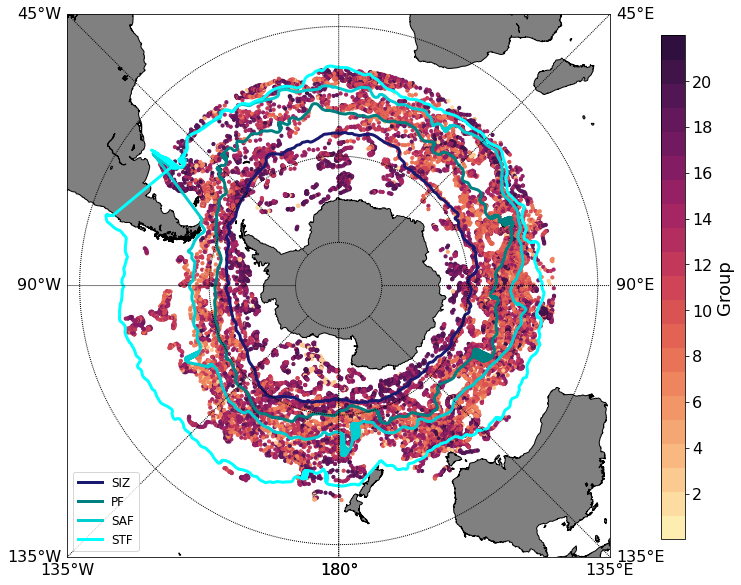

In [102]:
print('Create Figure 8a')
print('Find Southern Ocean')
subset=[i for i,j in enumerate(data['LATITUDE']) if j<-40]

cmap = cmocean.cm.matter  # define the colormap
# extract all colors from the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]

# # create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 22, num=22)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# # Import front data
data_path='/Users/rosalindechols/Documents/Generals/Self_Shading_Research/Data/'
pf_df = pd.read_pickle(data_path + 'df_front_latlon_pf.pkl')
saf_df = pd.read_pickle(data_path + 'df_front_latlon_saf.pkl')
siz_df = pd.read_pickle(data_path + 'df_front_latlon_siz.pkl')
stf_df = pd.read_pickle(data_path + 'df_front_latlon_stf.pkl')

print('Plot figure')
fig = plt.figure(figsize=(11, 10))
width = 14000000
# # m = Basemap(projection='spstere',boundinglat=--45,lon_0=270,resolution='l')
m = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
m.drawcoastlines()

cp=m.scatter(data['LONGITUDE'].values[subset],data['LATITUDE'].values[subset],c=new_labels[subset],s=10,latlon=True,cmap=cmap,norm=norm)
m.plot(siz_df.lon.values,siz_df.lat.values,latlon=True,lw=3,c='midnightblue',label='SIZ')
m.plot(pf_df.lon.values,pf_df.lat.values,latlon=True,lw=3,c='teal',label='PF')
m.plot(saf_df.lon.values,saf_df.lat.values,latlon=True,lw=3,c='darkturquoise',label='SAF')
m.plot(stf_df.lon.values,stf_df.lat.values,latlon=True,lw=3,c='cyan',label='STF')
m.fillcontinents(color='gray')

m.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
m.drawmeridians(np.arange(-180., 181., 45.), labels = [1,1,0,1], fontsize = 16)
plt.legend(loc=3,fontsize='large')
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cbar = fig.colorbar(cp,cax=cbar_ax,orientation='vertical',ticks=[2,4,6,8,10,12,14,16,18,20])
cbar.set_label('Group',fontsize=18)
cbar.ax.tick_params(labelsize=16) 

if save_figs==True:
    plt.savefig(sfpath+'Figure_8a.pdf',bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Create Figure 8b
Identify Monthly Subsets
Calculate percents


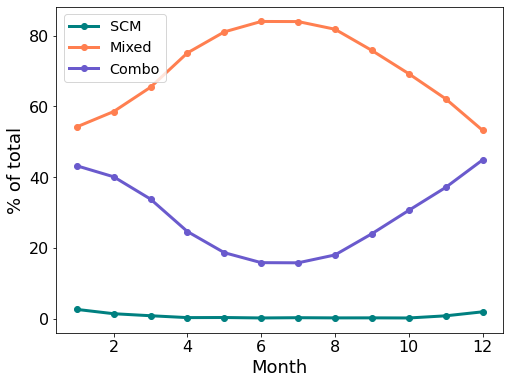

In [103]:
print('Create Figure 8b')

print('Identify Monthly Subsets')
dates = pd.to_datetime(data['JULD'].values).month
totals=np.zeros((12,3))
scm_totals=[]
mixed_totals=[]
combo_totals=[]
for n in range(1,13):
    totals[n-1,0]=len([i for i,j in enumerate(new_labels[subset]) if j+1 in scm_group and dates[subset][i]==n])
    totals[n-1,1]=len([i for i,j in enumerate(new_labels[subset]) if j+1 in mixed_group and dates[subset][i]==n])
    totals[n-1,2]=len([i for i,j in enumerate(new_labels[subset]) if j+1 in hetero_group and dates[subset][i]==n])

print('Calculate percents')
percents=np.zeros((12,3))
for n in range(1,13):
    percents[n-1,0]=totals[n-1,0]/sum(totals[n-1])
    percents[n-1,1]=totals[n-1,1]/sum(totals[n-1])
    percents[n-1,2]=totals[n-1,2]/sum(totals[n-1])

fig=plt.figure(figsize=(8,6))
plt.plot(np.arange(1,13),percents[:,0]*100,color='teal',lw=3,marker='o',label='SCM')
plt.plot(np.arange(1,13),percents[:,1]*100,color='coral',lw=3,marker='o',label='Mixed')
plt.plot(np.arange(1,13),percents[:,2]*100,color='slateblue',lw=3,marker='o',label='Combo')
plt.xlabel('Month',fontsize=18)
plt.ylabel('% of total', fontsize=18)
plt.tick_params(labelsize=16)
plt.legend(loc=2,fontsize='x-large')

if save_figs==True:
    plt.savefig(sfpath+'Figure_8b.pdf',bbox_inches='tight',format='pdf')
    plt.close()
else:
    plt.show()

Figure 9

Figure Caption: Figure 9. (a) Number of observations in each 5x5 box. (b) Percentage of profiles in each of the two major Southern Ocean subgroups (shallow SCM and well-mixed), annual average. (c) Same as (b), but “winter” months only. (d) Same as (b) but “summer” months only. 

Plot Figure 9a and b


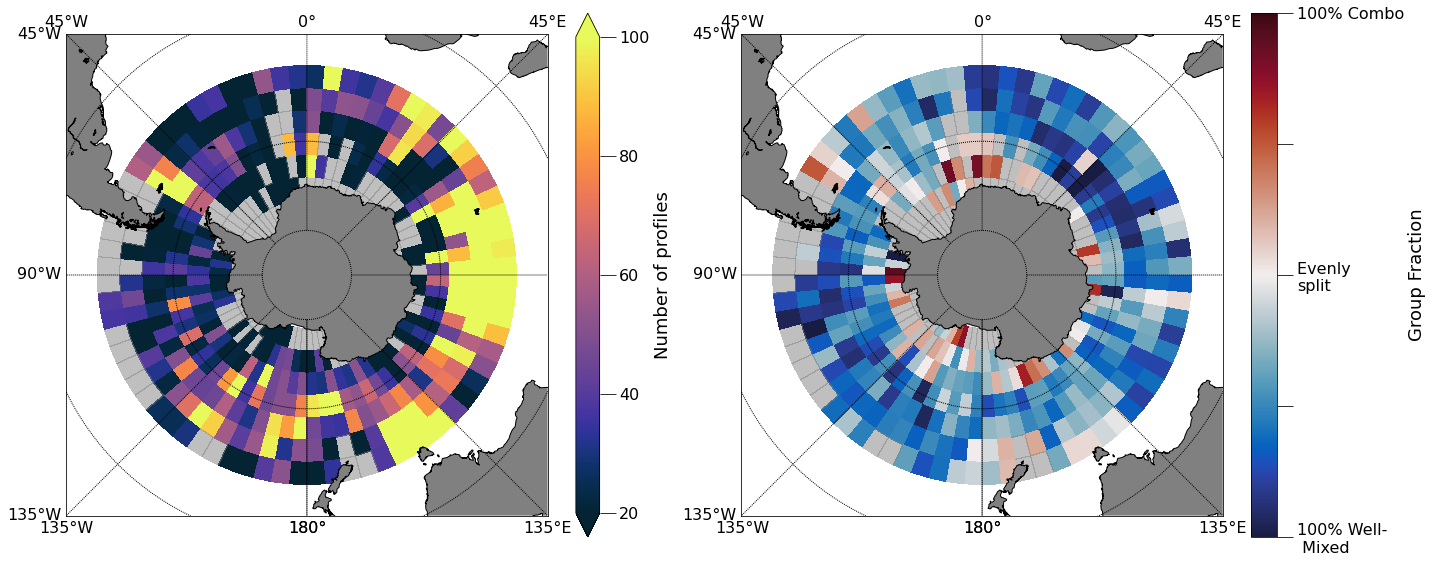

In [104]:
print('Plot Figure 9a and b')
increment = 5 #set to lat/lon box size
# print('Calculate totals and percents in each box')

x=np.arange(-180,181,increment)
y=np.arange(-78,-38,increment)
totals=np.nan*np.ones((len(y),len(x)))
frac=np.nan*np.ones((len(y),len(x)))
    
#sort data by latitude
lat_sort=sorted(data['LATITUDE'].values)

#retain original indices of sorted data
lat_sort_ind=data['LATITUDE'].values.argsort()

start=0
lats=0  #index for storing calculations

for n in y:
    lons=0
    if n%10==0:
        print("Current Latitude: ",n)
    #find 1-degree latitude subset
    try:
        end=next(i for i, j in enumerate(lat_sort) if j>=n+increment)
    except StopIteration:
        continue
    for nn in x:
        lon_set=[i for i,j in enumerate(data['LONGITUDE'].values[lat_sort_ind[start:end]]) if nn <= j < nn+increment
                and new_labels[lat_sort_ind[start:end][i]] + 1 not in scm_group]
        #ignore boxes with fewer than 5 data points
        if len(lon_set)<5:
            pass
        else:
            het=len([i for i, j in enumerate(new_labels[lat_sort_ind[start:end][lon_set]]) if j+1 in hetero_group])
            totals[lats,lons]=len(lon_set)
            frac[lats,lons]=het/len(lon_set)
        lons+=1
    lats+=1
    start=end

#plot Southern Ocean plots
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(121)
width = 12000000
m1 = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
m1.drawcoastlines()
m1.fillcontinents(color='gray')
m1.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
m1.drawmeridians(np.arange(-180., 181., 45.), labels = [1,0,1,1], fontsize = 16)
X,Y = np.meshgrid(x,y) 
cmap=cmocean.cm.thermal
cmap.set_bad('gray',alpha=0.5)
cp1=m1.pcolormesh(X,Y,totals,cmap=cmap,vmin=20,vmax=100,latlon='True')
cbar1=plt.colorbar(cp1,shrink=0.75,fraction=0.1,ticks=[20,40,60,80,100],extend='both')
cbar1.ax.tick_params(size=16)
cbar1.ax.set_yticklabels(['20','40','60','80','100'],fontsize=16)
cbar1.set_label('Number of profiles',fontsize=18)

ax2=fig.add_subplot(122)
width = 12000000

m2 = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
m2.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
m2.drawmeridians(np.arange(-180., 181., 45.), labels = [1,0,1,1], fontsize = 16)
m2.drawcoastlines()
m2.fillcontinents(color='gray')
cmap=cmocean.cm.balance
cmap.set_bad('gray',alpha=0.5)
cp2=m2.pcolormesh(X,Y,frac,cmap=cmap,latlon='True',vmin=0,vmax=1)
cbar2=plt.colorbar(cp2,shrink=0.75,fraction=0.1,ticks=[0,0.25,0.5,0.75,1]) 
cbar2.ax.tick_params(size=16)
cbar2.ax.set_yticklabels(['100% Well-\n Mixed','','Evenly \nsplit','','100% Combo'],fontsize=16)
cbar2.set_label('Group Fraction',fontsize=18)
plt.tight_layout()

if save_figs==True:
    plt.savefig(sfpath+'Figure_9ab.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Create Figures 9c and d


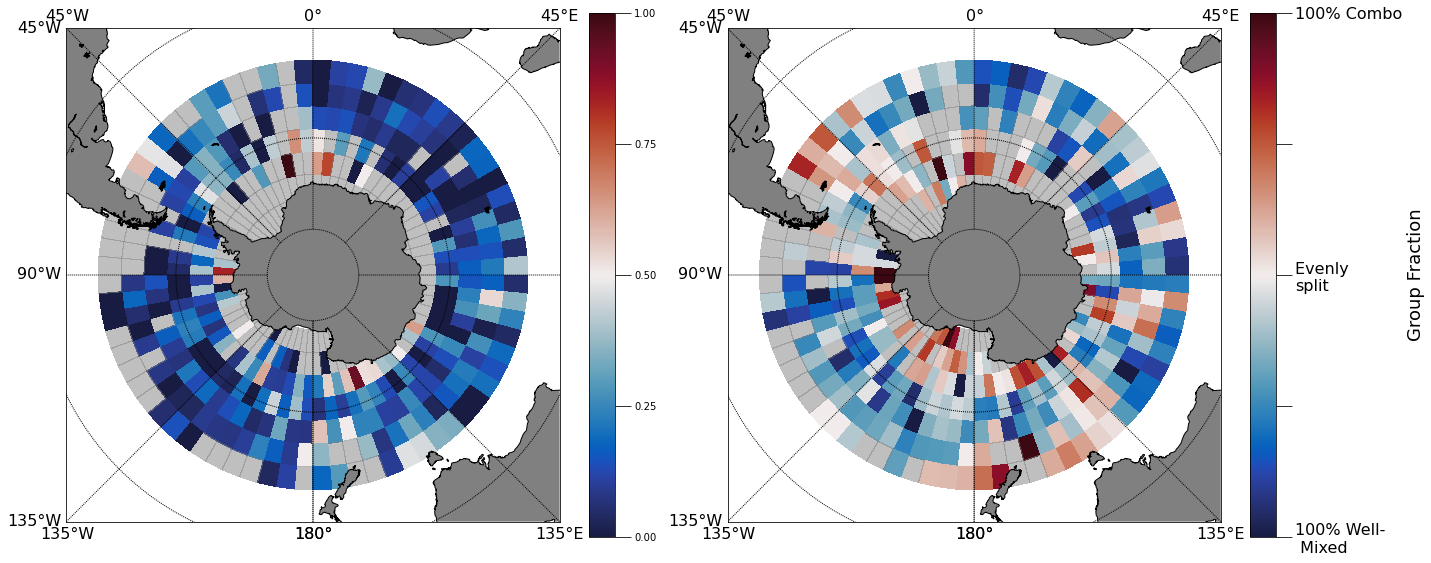

In [105]:
print('Create Figures 9c and d')

increment = 5 #set to lat/lon box size
# print('Calculate totals and percents in each box')

x=np.arange(-180,181,increment)
y=np.arange(-78,-38,increment)
totals_summer = np.nan*np.ones((len(y),len(x)))
totals_winter = np.nan*np.ones((len(y),len(x)))
frac_summer = np.nan*np.ones((len(y),len(x)))
frac_winter = np.nan*np.ones((len(y),len(x)))
    
#sort data by latitude
lat_sort=sorted(data['LATITUDE'].values)

#retain original indices of sorted data
lat_sort_ind=data['LATITUDE'].values.argsort()

start=0
lats=0  #index for storing calculations

for n in y:
    lons=0
    #find 5-degree latitude subset
    try:
        end=next(i for i, j in enumerate(lat_sort) if j>=n+increment)
    except StopIteration:
        continue
    for nn in x:
        lon_set_winter=[i for i,j in enumerate(data['LONGITUDE'].values[lat_sort_ind[start:end]]) 
                        if nn <= j < nn+increment and dates[lat_sort_ind[start:end]][i] in [4,5,6,7,8,9]
                       and new_labels[lat_sort_ind[start:end][i]] + 1 not in scm_group]
        lon_set_summer=[i for i,j in enumerate(data['LONGITUDE'].values[lat_sort_ind[start:end]]) 
                        if nn <= j < nn+increment and dates[lat_sort_ind[start:end]][i] in [10,11,12,1,2,3]
                       and new_labels[lat_sort_ind[start:end][i]] + 1 not in scm_group]

        if len(lon_set_summer)<5:
            pass
        else:
            het_summer=len([i for i, j in enumerate(new_labels[lat_sort_ind[start:end][lon_set_summer]]) 
                     if j+1 in hetero_group])# and dates[lat_sort_ind[start:end]][i] in [5,6,7,8,9,10]])
            totals_summer[lats,lons]=len(lon_set_summer)
            frac_summer[lats,lons]=het_summer/len(lon_set_summer)
            
        if len(lon_set_winter)<5:
            pass
        else:
            het_winter=len([i for i, j in enumerate(new_labels[lat_sort_ind[start:end][lon_set_winter]]) 
                     if j+1 in hetero_group])# and dates[lat_sort_ind[start:end]][i] in [11,12,1,2,3,4]])
            totals_winter[lats,lons]=len(lon_set_winter)
            frac_winter[lats,lons]=het_winter/len(lon_set_winter)
             
        lons+=1
    lats+=1
    start=end

fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(121)
width = 12000000
m1 = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
m1.drawcoastlines()
m1.fillcontinents(color='gray')
m1.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
m1.drawmeridians(np.arange(-180., 181., 45.), labels = [1,0,1,1], fontsize = 16)
X,Y = np.meshgrid(x,y) 
cmap=cmocean.cm.balance
cmap.set_bad('gray',alpha=0.5)
cp1=m1.pcolormesh(X,Y,frac_winter,cmap=cmap,vmin=0,vmax=1,latlon='True')
cbar1=plt.colorbar(cp1,shrink=0.75,fraction=0.1,ticks=[0,0.25,0.5,0.75,1]) 
cbar1.ax.tick_params(size=16)
# cbar1.ax.set_yticklabels(['10','20','30','40','50'],fontsize=16)

ax2=fig.add_subplot(122)
width = 12000000

m2 = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
m2.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
m2.drawmeridians(np.arange(-180., 181., 45.), labels = [1,0,1,1], fontsize = 16)
m2.drawcoastlines()
m2.fillcontinents(color='gray')
cmap=cmocean.cm.balance
cmap.set_bad('gray',alpha=0.5)
cp2=m2.pcolormesh(X,Y,frac_summer,cmap=cmap,latlon='True',vmin=0,vmax=1)
cbar2=plt.colorbar(cp2,shrink=0.75,fraction=0.1,ticks=[0,0.25,0.5,0.75,1]) 
cbar2.ax.tick_params(size=16)
cbar2.ax.set_yticklabels(['100% Well-\n Mixed','','Evenly \nsplit','','100% Combo'],fontsize=16)
cbar2.set_label('Group Fraction',fontsize=18)

plt.tight_layout()

if save_figs==True:
    plt.savefig(sfpath+'Figure_9cd.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Figure 10

Create Figure 10
Find profiles of interest
Find seasons
Find seasonal distribution
0
1
2
3


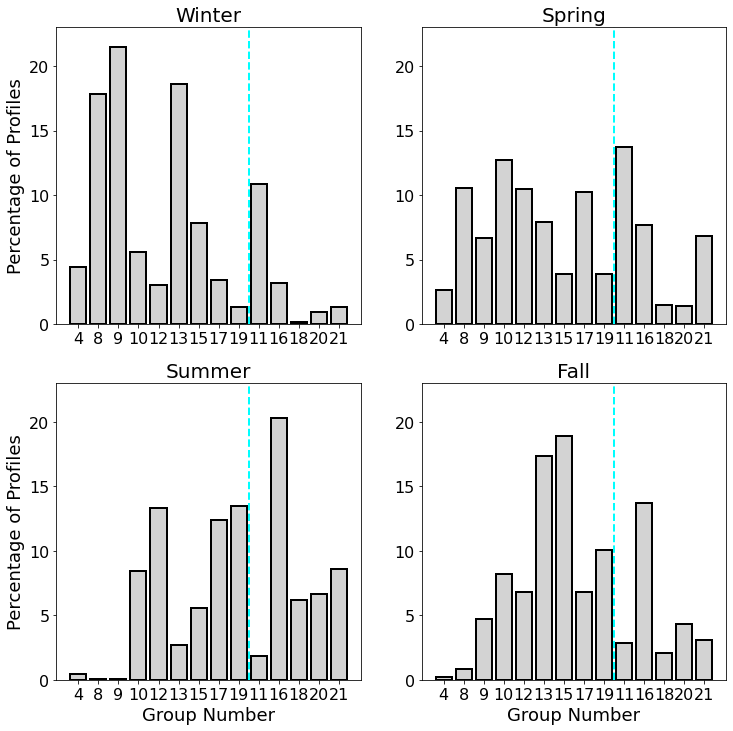

In [106]:
print('Create Figure 10')
#focus on profiles within the two main subgroups:
so_group=[4,8,9,10,12,13,15,17,19,11,16,18,20,21]

print('Find profiles of interest')
subset=[i for i,j in enumerate(data['LATITUDE']) if j<-40 and new_labels[i]+1 in so_group]

months=pd.to_datetime(data['JULD'].values[subset]).month

print('Find seasons')    
seasons_south=[[6,7,8],[9,10,11],[12,1,2],[3,4,5]]
season_names=['Winter','Spring','Summer','Fall']
seasons=np.zeros(len(subset))
for n in range(0,len(months)):
    for nn in range(0,len(seasons_south)):
        if months[n] in seasons_south[nn]:
            seasons[n]=nn
            
print('Find seasonal distribution')
bars=np.zeros((4,len(so_group)))
for n in range(0,len(seasons_south)):
    print(n)
    for nn in range(0,len(so_group)):
        bars[n,nn]=len([i for i,j in enumerate(seasons) if j==n and new_labels[subset][i]+1==so_group[nn]])
            
fig=plt.figure(figsize=(12,12))
for n in range(0,4):
    ax=fig.add_subplot(2,2,n+1)
    plt.title(season_names[n],fontsize=20)
    seasonal=len([i for i,j in enumerate(seasons) if j==n])
    plt.bar(range(len(so_group)),bars[n]*100/seasonal,facecolor='lightgray',edgecolor='k',linewidth=2)
    plt.axvline(8.5,color='cyan',linestyle='dashed',linewidth=2)
    plt.xticks(ticks=range(len(so_group)),labels=so_group)
    plt.tick_params(labelsize=16)
    if n in [0,2]:
        plt.ylabel('Percentage of Profiles',fontsize=18)
    if n in [2,3]:
        plt.xlabel('Group Number',fontsize=18)
    plt.ylim(0,23)

plt.show()

Figure 11

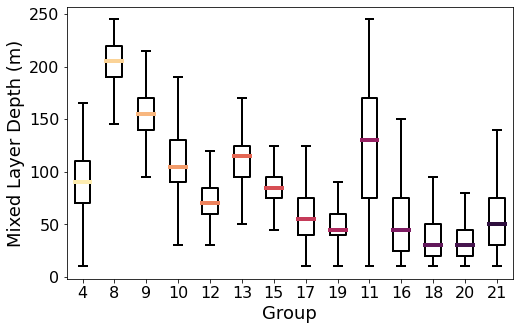

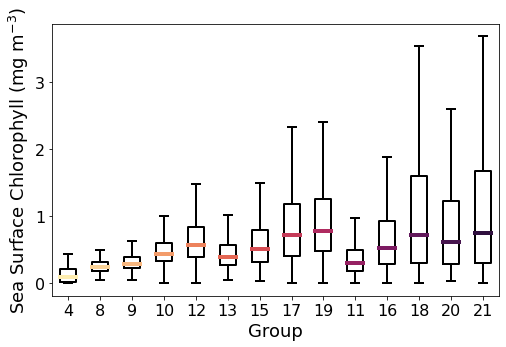

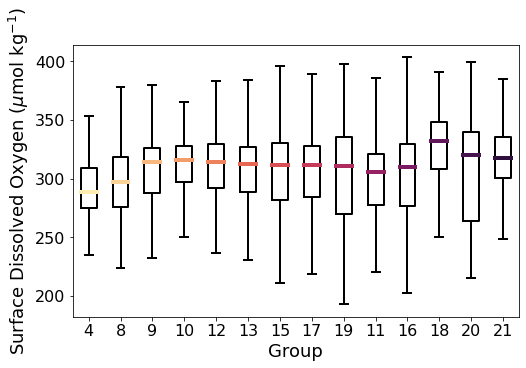

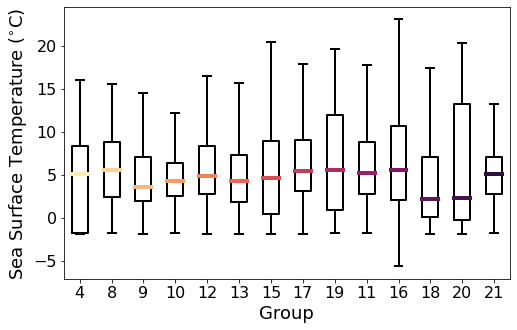

In [107]:
def box_plot(data_array,ylabel,xticks,sfpath,suffix,save_figs=False):
    #make boxplot
    colors = cmocean.cm.matter(np.linspace(0,1,len(data_array)))
    fig=plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    bp=ax.boxplot(data_array,sym='')#,notch=True)
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        box.set(linewidth=2)
    
    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(linewidth=2)
    
    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(linewidth=2)
    
    ## change color and linewidth of the medians
    count=0
    for median in bp['medians']:
        median.set(color=colors[count], linewidth=4)
        count+=1
    
    plt.tick_params(labelsize=16)
    plt.xlabel('Group',fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.xticks(np.arange(1,len(xticks)+1),labels=xticks)
    if save_figs==True:
        plt.savefig(sfpath+'Figure_10%s.pdf' %suffix,format='pdf',bbox_inches='tight')
        plt.close()  
    else:
        plt.show()

o2_surf=[]
sst=[]
all_mld=[]
chl_surf=[]
              
for n in so_group:
    group=[i for i,j in enumerate(new_labels[subset]) if j+1==n]
    sst.append(data['TEMP'][subset][group,1][~np.isnan(data['TEMP'][subset][group,1])])
    all_mld.append(data['MLD'][subset][group][~np.isnan(data['MLD'][subset][group])])
    o2_surf.append(data['DOXY'][subset][group,1][~np.isnan(data['DOXY'][subset][group,1])])
    chl_surf.append(data['CHLA'][subset][group,1][~np.isnan(data['CHLA'][subset][group,1])])

#box_plot(data_array,ylabel,xticks,sfpath,suffix,save_figs==False)
box_plot(all_mld,'Mixed Layer Depth (m)',so_group,sfpath,'a')
box_plot(chl_surf,'Sea Surface Chlorophyll (mg m$^{-3}$)',so_group,sfpath,'b')
box_plot(o2_surf,'Surface Dissolved Oxygen ($\mu$mol kg$^{-1}$)',so_group,sfpath,'c')
box_plot(sst,'Sea Surface Temperature ($^{\circ}$C)',so_group,sfpath,'d')

Figure 12

Create Figure 12a
Find all Southern Ocean profiles
Classify Probabilities
Find seasons
Create Plots


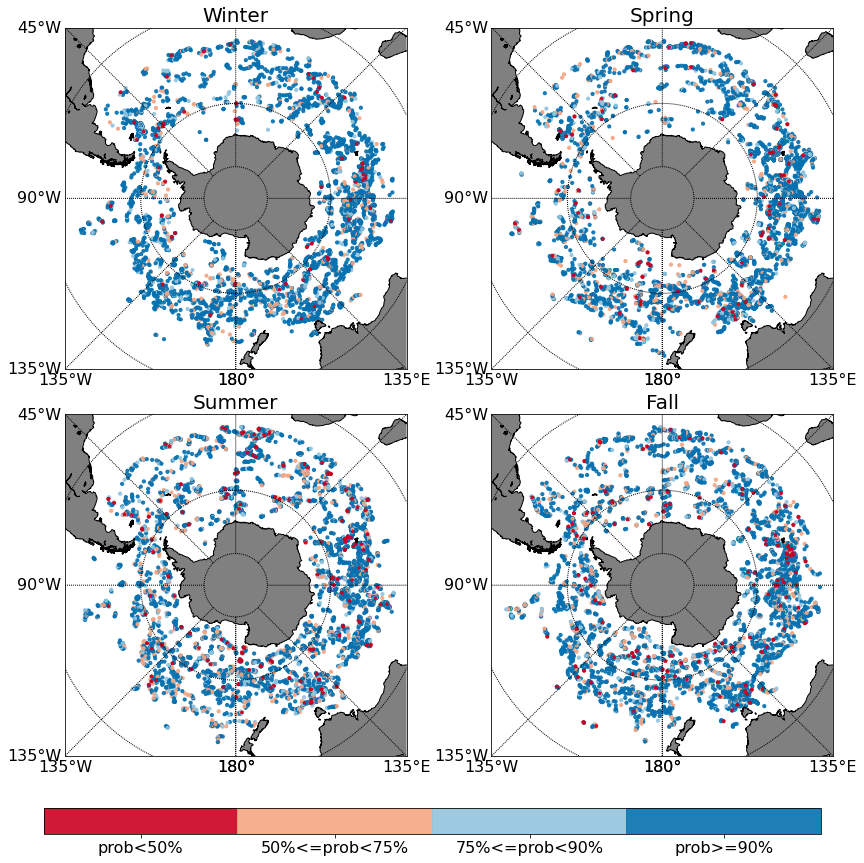

In [108]:
print('Create Figure 12a')

print('Find all Southern Ocean profiles')
subset=[i for i,j in enumerate(data['LATITUDE']) if j<-40]

#classify posterior probabilities into four groups:
print('Classify Probabilities')
weights=np.array([j[data['gmm_labels'].values[subset][i]] for i, j in enumerate(data['gmm_probs'][subset])])
#profiles with < 50% probability
so_bad=[]
plot_labels=np.zeros(len(weights))
for n in range(0,len(weights)):
    if weights[n]<0.5:
        plot_labels[n]=0
        so_bad.append(n)
    elif 0.5<=weights[n]<0.75:
        plot_labels[n]=1
    elif 0.75<=weights[n]<0.9:
        plot_labels[n]=2
    else:
        plot_labels[n]=3

print('Find seasons')   
months=pd.to_datetime(data['JULD'].values[subset]).month
seasons_south=[[6,7,8],[9,10,11],[12,1,2],[3,4,5]]
season_names=['Winter','Spring','Summer','Fall']
seasons=np.zeros(len(subset))
for n in range(0,len(months)):
    for nn in range(0,len(seasons_south)):
        if months[n] in seasons_south[nn]:
            seasons[n]=nn
        
print('Create Plots')
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#ca0020','#f4a582','#92c5de','#0571b0'])
bounds=np.linspace(0, 4, num=5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

titles=['Winter','Spring','Summer','Fall']
fig=plt.figure(figsize=(12,12))
for nn in range(0,len(seasons_south)):
    ax=fig.add_subplot(2,2,nn+1)
    ax.set_title(titles[nn],fontsize=20)
    group=[i for i,j in enumerate(months) if j in seasons_south[nn]]
    group_b=[i for i,j in enumerate(months) if j in seasons_south[nn] and i in so_bad]
    width = 12000000
    m1 = Basemap(width=width,height=width,projection='aeqd',lat_0=-90,lon_0=0,resolution='l')
    m1.drawcoastlines()
    m1.fillcontinents(color='gray')
    m1.drawparallels(np.arange(-90., -29., 30.), labels = [0,0,0,0], fontsize = 16)
    m1.drawmeridians(np.arange(-180., 181., 45.), labels = [1,0,0,1], fontsize = 16)
    cp=m1.scatter(data['LONGITUDE'].values[subset][group],data['LATITUDE'].values[subset][group],s=10,alpha=0.9,c=plot_labels[group],cmap=cmap, norm=norm,latlon=True)
    m1.scatter(data['LONGITUDE'].values[subset][group_b],data['LATITUDE'].values[subset][group_b],s=10,marker='*',alpha=0.9,c=plot_labels[group_b],cmap=cmap, norm=norm,latlon=True)

plt.tight_layout()
fig.subplots_adjust(bottom=0.12)
cbar_ax = fig.add_axes([0.05, 0.03, 0.9, 0.03])
cbar = fig.colorbar(cp,cax=cbar_ax,orientation='horizontal',ticks=[0.5,1.5,2.5,3.5])
cbar.ax.set_xticklabels(['prob<50%','50%<=prob<75%','75%<=prob<90%','prob>=90%'])
cbar.ax.tick_params(labelsize=16)

if save_figs==True:
    plt.savefig(sfpath+'Figure_12a.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Create Figure 12b and c
Plot Hists


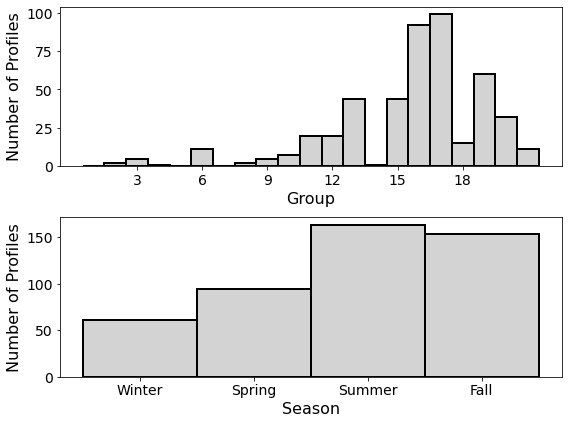

In [109]:
print('Create Figure 12b and c')

print('Plot Hists')
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(2,1,1)
ax1.hist(new_labels[subset][so_bad]+1,bins=np.arange(1,23),lw=2,edgecolor='k',facecolor='lightgray')
ax1.set_xlabel('Group',fontsize=16)
ax1.set_ylabel('Number of Profiles',fontsize=16)
ax1.tick_params(labelsize=14)
ax1.set_xticks([3.5,6.5,9.5,12.5,15.5,18.5])
ax1.set_xticklabels([3,6,9,12,15,18])

ax2=fig.add_subplot(2,1,2)
ax2.hist(seasons[so_bad]+1,bins=np.arange(1,6),lw=2,edgecolor='k',facecolor='lightgray') 
ax2.set_xlabel('Season',fontsize=16)
ax2.set_ylabel('Number of Profiles',fontsize=16)
ax2.tick_params(labelsize=14)
ax2.set_xticks([1.5,2.5,3.5,4.5])
ax2.set_xticklabels(['Winter','Spring','Summer','Fall'])

plt.tight_layout()

if save_figs==True:
    plt.savefig(sfpath+'Figure_12bc.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Create Figure 12c


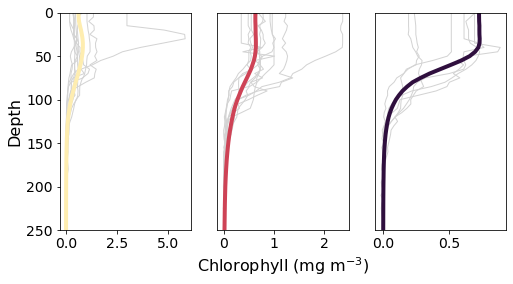

In [110]:
print('Create Figure 12c')
# #plot low-probability profiles for clusters 16, 17, and 19
d1=[i for i,j in enumerate(new_labels[subset][so_bad]) if j+1==16]
d2=[i for i,j in enumerate(new_labels[subset][so_bad]) if j+1==17]
d3=[i for i,j in enumerate(new_labels[subset][so_bad]) if j+1==19]

colors = cmocean.cm.matter(np.linspace(0,1,3))
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,3,1)
for n in range(0,len(d1),10):
    ax1.plot(data['CHLA'][subset][so_bad][d1][n],data['DEPTH'][0],lw=1,c='lightgray',zorder=1)
ax1.plot(data['CHLA_ave'][data['gmm_new_groups'][15]],data['DEPTH'][0],lw=4,c=colors[0])
plt.tick_params(labelsize=14)
ax1.set_ylabel('Depth',fontsize=16)
# # ax1.set_xlabel('Chlorophyll (mg m$^{-3}$)', fontsize=16)
ax1.set_ylim(250,0)

ax2=fig.add_subplot(1,3,2)
for n in range(0,len(d2),10):
    ax2.plot(data['CHLA'][subset][so_bad][d2][n],data['DEPTH'][0],lw=1,c='lightgray',zorder=1)
ax2.plot(data['CHLA_ave'][data['gmm_new_groups'][16]],data['DEPTH'][0],lw=4,c=colors[1])
plt.tick_params(labelsize=14)
ax2.axes.yaxis.set_visible(False)
ax2.set_xlabel('Chlorophyll (mg m$^{-3}$)', fontsize=16)
ax2.set_ylim(250,0)

ax3=fig.add_subplot(1,3,3)
for n in range(0,len(d3),10):
    ax3.plot(data['CHLA'][subset][so_bad][d3][n],data['DEPTH'][0],lw=1,c='lightgray',zorder=1)
ax3.plot(data['CHLA_ave'][data['gmm_new_groups'][18]],data['DEPTH'][0],lw=4,c=colors[2])
ax3.axes.yaxis.set_visible(False)
plt.tick_params(labelsize=14)
# # ax3.set_xlabel('Chlorophyll (mg m$^{-3}$)', fontsize=16)
ax3.set_ylim(250,0)

# # plt.tight_layout()
if save_figs==True:
    plt.savefig(sfpath+'Figure_12d.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Figure 13: The plotting here is broken down into several steps, so you don't have to rerun the lengthier pieces if you decide to tinker. The first cell categorizes each profile as a daytime profile or nighttime profile using the associated code "night_time.py". The next cell calculates statistics for each group of profiles. You can save the data from each step if you want to use it again later. 

In [111]:
#The night_time code takes advantage of the astronomy package "skyfield" to determine sunrise/sunset at different 
#geographical locations and times of year. 
save_data=False

import night_time as nt
from skyfield import api
ts = api.load.timescale()
e = api.load('de421.bsp')

test=subset
g=so_group

print('Find day vs. night profiles')
night_time,day_time=nt.is_it_night(data,test,ts,e)

if save_data==True:
    np.savetxt(sfpath+"night_time_profiles.txt", night_time, delimiter=",")
    np.savetxt(sfpath+"day_time_profiles.txt", day_time, delimiter=",")

Find day vs. night profiles
File # 0
File # 1000
File # 2000
File # 3000
File # 4000
File # 5000
File # 6000
File # 7000
File # 8000
File # 9000
File # 10000
File # 11000
File # 12000
File # 13000
File # 14000
File # 15000
File # 16000
File # 17000
File # 18000
File # 19000
File # 20000
File # 21000
File # 22000
File # 23000
0 0


In [112]:
from scipy import stats
day=[]
night=[]
day_totals=np.zeros(len(g))
night_totals=np.zeros(len(g))
day_median=np.zeros(len(g))
night_median=np.zeros(len(g))
day_std=np.zeros(len(g))
night_std=np.zeros(len(g))

print('Find statistics for each group')
group_ave_day=np.nan*np.ones((len(g),51))
group_std_day=np.nan*np.ones((len(g),51))

group_ave_night=np.nan*np.ones((len(g),51))
group_std_night=np.nan*np.ones((len(g),51))
count=0

for n in g:
    group=[i for i,j in enumerate(new_labels[test]) if j+1==n]

    day_counts=[i for i,j in enumerate(group) if j in day_time]
    night_counts=[i for i,j in enumerate(group) if j in night_time]

    group_ave_day[count]=np.average(data['CHLA'].values[test][group][day_counts],0,weights=data['gmm_probs'].values[test][group][day_counts,data['gmm_new_groups'][n-1]])
        #weighted standard deviation
    variance = np.average((data['CHLA'].values[test][group][day_counts]-group_ave_day[count])**2,0, weights=data['gmm_probs'].values[test][group][day_counts,data['gmm_new_groups'][n-1]])
    group_std_day[count]=variance**0.5

    group_ave_night[count]=np.average(data['CHLA'].values[test][group][night_counts],0,weights=data['gmm_probs'].values[test][group][night_counts,data['gmm_new_groups'][n-1]])
        #weighted standard deviation
    variance = np.average((data['CHLA'].values[test][group][night_counts]-group_ave_night[count])**2,0, weights=data['gmm_probs'].values[test][group][night_counts,data['gmm_new_groups'][n-1]])
    group_std_night[count]=variance**0.5

    night_totals[count]=len(night_counts)
    day_totals[count]=len(day_counts)
    day.append(data['CHLA'].values[test][group][day_counts,1])
    night.append(data['CHLA'].values[test][group][night_counts,1])
    day_median[count]=np.median(data['CHLA'].values[test][group][day_counts,1])
    night_median[count]=np.median(data['CHLA'].values[test][group][night_counts,1])
    day_std[count]=stats.sem(data['CHLA'].values[test][group][day_counts,1])
    night_std[count]=stats.sem(data['CHLA'].values[test][group][night_counts,1])
    count+=1

labels=['Total_Day','Total_Night','Daytime_Surface_Median','Nightime_Surface_Median']
data_to_save=np.array((day_totals,night_totals,day_median,night_median))
df=pd.DataFrame(data_to_save.transpose(),columns=labels)
if save_data==True:
    df.to_csv(sfpath+'day_night_data.csv')

#Calculate whether day/night values are statistically different
sig=np.zeros(len(day))
uval=np.zeros(len(day))
for n in range(len(day)):
    uval[n],sig[n]=stats.mannwhitneyu(day[n],night[n],alternative ='two-sided')
    
if save_data==True:
    np.savetxt(sfpath+"mann_whitney_SO.txt", [uval,sig], delimiter=",")
    
print('Done')

Find statistics for each group
Done


Create Figure 13a


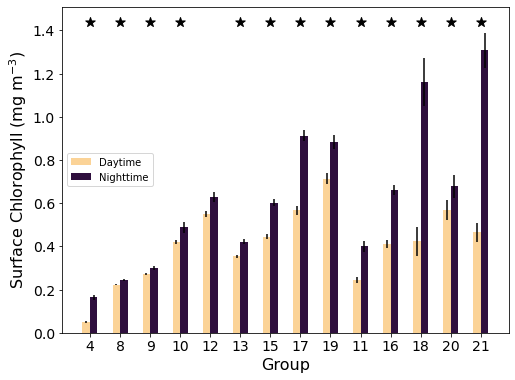

In [113]:
print('Create Figure 13a')
colors = cmocean.cm.matter(np.linspace(0,1,len(g)))
plot_data=[i for i,j in enumerate(sig) if j<=0.05]
fig=plt.figure(figsize=(8,6))
p1=plt.bar(np.arange(len(g)),day_median,width=0.25,facecolor=colors[1],yerr=day_std)
p2=plt.bar(np.arange(len(g))+0.25,night_median,width=0.25,facecolor=colors[len(g)-1],yerr=night_std)
plt.scatter(np.arange(len(g))[plot_data]+0.125,(max(night_median)+0.1*max(night_median))*np.ones(len(plot_data)),marker='*',s=100,c='k')
plt.xticks(np.arange(len(g))+0.125,labels=g)
plt.tick_params(labelsize=14)
plt.xlabel('Group',fontsize=16)
plt.ylabel('Surface Chlorophyll (mg m$^{-3}$)',fontsize=16)
plt.legend((p1[0], p2[0]), ('Daytime', 'Nighttime'))

if save_figs==True:
    plt.savefig(sfpath+'Figure_12a.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()

Create Figure 13b


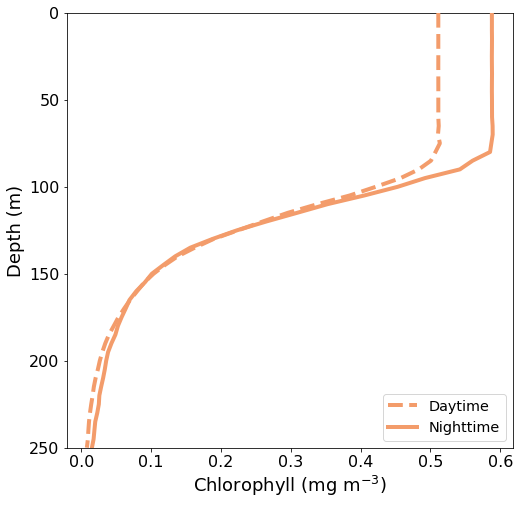

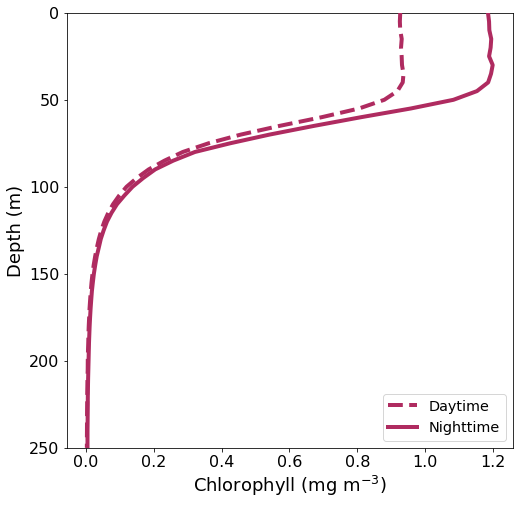

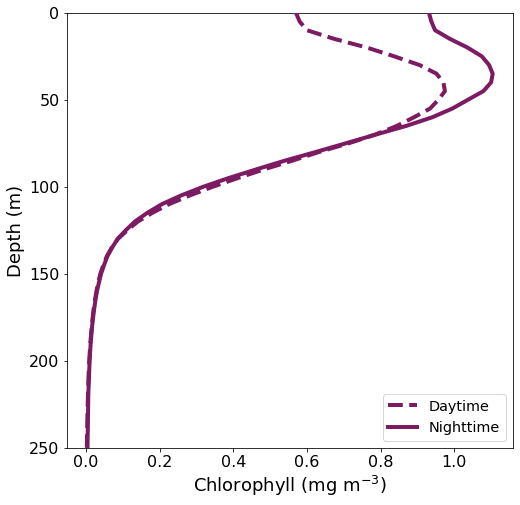

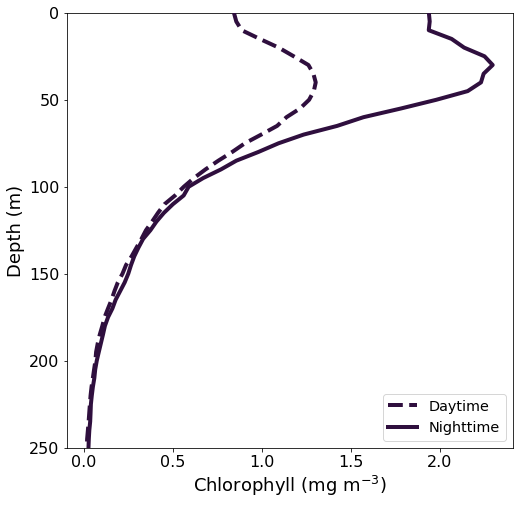

In [114]:
print('Create Figure 13b')

#You can use this to plot any of the day vs. night profiles from above. The default setting here is just to
#plot the ones shown in the paper, 10, 19, 16, and 21 (indices: 3, 8, 10, 13)
so_group=[4,8,9,10,12,13,15,17,19,11,16,18,20,21]
for n in [3,8,10,13]:
    fig=plt.figure(figsize=(8,8))
    plt.plot(group_ave_day[n],data['DEPTH'][0],lw=4,c=colors[n],zorder=3,linestyle='dashed',label='Daytime')
    plt.plot(group_ave_night[n],data['DEPTH'][0],lw=4,c=colors[n],zorder=3,label='Nighttime')
    plt.ylim(250,0)
    plt.xlabel('Chlorophyll (mg m$^{-3}$)',fontsize=18)
    plt.ylabel('Depth (m)', fontsize=18)
    plt.tick_params(labelsize=16)
    plt.legend(loc=4,fontsize='x-large')
    if save_figs==True:
        plt.savefig(sfpath+'Figure_13b_profile_%d.pdf'%(so_group[n]),bbox_inches='tight',format='pdf')
        plt.close()
    else:
        plt.show()

Supplemental Figure 4

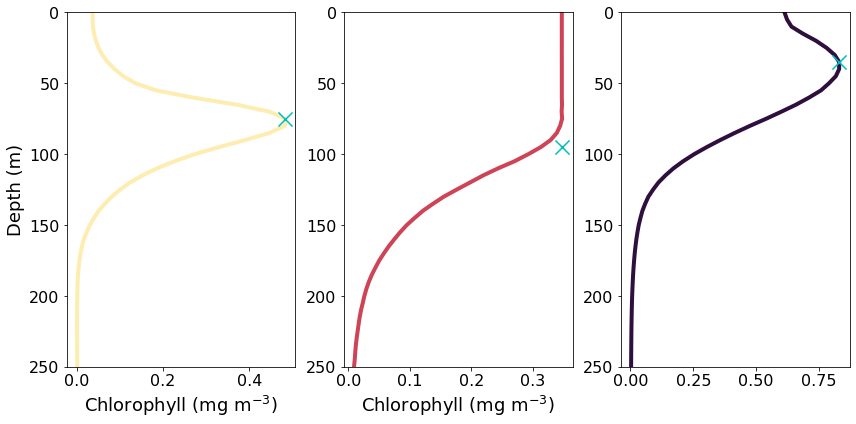

In [120]:
def chl_mld(data,index,threshold=0.01):
    ref_value = data['CHLA_ave'][index,2]
    d_mld = ref_value - threshold
    try:
        ind=next(i-1 for i, j in enumerate(data['CHLA_ave'][index]) if (j <= d_mld and i > 2))
        mld=data['DEPTH'][0,ind]
    except StopIteration:
        mld=np.nan
        ind=np.nan
    
    return mld,ind

cmld1=np.zeros(len(mixed_group))
    
for n in range(0,len(mixed_group)):    
    if n==0:
        cmld1[n],ind=chl_mld(data,data['gmm_new_groups'][mixed_group[n]-1],threshold=0.01)
    else:
        cmld1[n],ind=chl_mld(data,data['gmm_new_groups'][mixed_group[n]-1],threshold=0.01)

chl_max1=np.zeros(len(scm_group))
for n in range(0,len(scm_group)):
    loc=next(i for i,j in enumerate(data['CHLA_ave'][data['gmm_new_groups'][scm_group[n]-1]]) if j==max(data['CHLA_ave'][data['gmm_new_groups'][scm_group[n]-1]]))
    chl_max1[n]=data['DEPTH'][0,loc]

chl_max2=np.zeros(len(hetero_group))
for n in range(0,len(hetero_group)):
    loc=next(i for i,j in enumerate(data['CHLA_ave'][data['gmm_new_groups'][hetero_group[n]-1]]) if j==max(data['CHLA_ave'][data['gmm_new_groups'][hetero_group[n]-1]]))
    chl_max2[n]=data['DEPTH'][0,loc]
        
colors = cmocean.cm.matter(np.linspace(0,1,3))
fig=plt.figure(figsize=(12,6))
group=[i for i,j in enumerate(new_labels) if j+1==1]

ax1=fig.add_subplot(131)
ax1.plot(data['CHLA_ave'][data['gmm_new_groups'][scm_group[2]-1]],data['DEPTH'][0],lw=4,c=colors[0])
ax1.scatter(max(data['CHLA_ave'][data['gmm_new_groups'][scm_group[2]-1]]),chl_max1[2],marker='x',c='c',s=200,zorder=3)
ax1.set_ylabel('Depth (m)', fontsize=18)
ax1.set_xlabel('Chlorophyll (mg m$^{-3}$)', fontsize=18)
plt.ylim(250,0)
plt.tick_params(labelsize=16)

ax2=fig.add_subplot(132)
ax2.plot(data['CHLA_ave'][data['gmm_new_groups'][mixed_group[3]-1]],data['DEPTH'][0],lw=4,c=colors[1])
ax2.scatter(max(data['CHLA_ave'][data['gmm_new_groups'][mixed_group[3]-1]]),cmld1[2],marker='x',c='c',s=200,zorder=3)
ax2.set_xlabel('Chlorophyll (mg m$^{-3}$)', fontsize=18)
plt.ylim(250,0)
plt.tick_params(labelsize=16)

ax3=fig.add_subplot(133)
ax3.plot(data['CHLA_ave'][data['gmm_new_groups'][hetero_group[2]-1]],data['DEPTH'][0],lw=4,c=colors[2])
ax3.scatter(max(data['CHLA_ave'][data['gmm_new_groups'][hetero_group[2]-1]]),chl_max2[2],marker='x',c='c',s=200,zorder=3)
plt.ylim(250,0)
plt.tick_params(labelsize=16)

plt.tight_layout()

if save_figs==True:
    plt.savefig(sfpath+'Figure_S4.pdf',format='pdf',bbox_inches='tight')
    plt.close()
else:
    plt.show()